Problem 1

In [27]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score
import matplotlib.pyplot as plt

In [28]:
iris = load_iris()

In [29]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [30]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
df.shape

(150, 4)

In [32]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [33]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
max_depths = [1, 2, 3, 4, 5]

In [35]:
recall_scores = []
precision_scores = []
f1_scores = []
output_lines = []

In [36]:
for depth in max_depths:
    tree = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, max_depth=depth,random_state=42)
    tree.fit(X_train, y_train)

    y_pred = tree.predict(X_test)

    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    recall_scores.append(recall)

    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    precision_scores.append(precision)

    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    f1_scores.append(f1)

    print(f"When the maximum depth is {depth}:")
    print(f"Recall: {recall:.6f}")
    print(f"Precision: {precision:.6f}")
    print(f"F1 score: {f1:.6f}")
    print("-" * 30)

When the maximum depth is 1:
Recall: 0.666667
Precision: 0.500000
F1 score: 0.555556
------------------------------
When the maximum depth is 2:
Recall: 0.974359
Precision: 0.976190
F1 score: 0.974321
------------------------------
When the maximum depth is 3:
Recall: 1.000000
Precision: 1.000000
F1 score: 1.000000
------------------------------
When the maximum depth is 4:
Recall: 1.000000
Precision: 1.000000
F1 score: 1.000000
------------------------------
When the maximum depth is 5:
Recall: 1.000000
Precision: 1.000000
F1 score: 1.000000
------------------------------


In [37]:
highest_recall_depth = max_depths[recall_scores.index(max(recall_scores))]
print(f"Depth corresponding to the highest recall: {highest_recall_depth}")
print(f"Highest recall: {max(recall_scores)}")

Depth corresponding to the highest recall: 3
Highest recall: 1.0


In [38]:
lowest_precision_depth = max_depths[precision_scores.index(min(precision_scores))]
print(f"Depth corresponding to the lowest precision: {lowest_precision_depth}")
print(f"Lowest precision: {min(precision_scores)}")

Depth corresponding to the lowest precision: 1
Lowest precision: 0.5


In [39]:
best_f1_depth = max_depths[f1_scores.index(max(f1_scores))]
print(f"Depth corresponding to the best F1 score: {best_f1_depth}")
print(f"Best F1 score: {max(f1_scores)}")

Depth corresponding to the best F1 score: 3
Best F1 score: 1.0


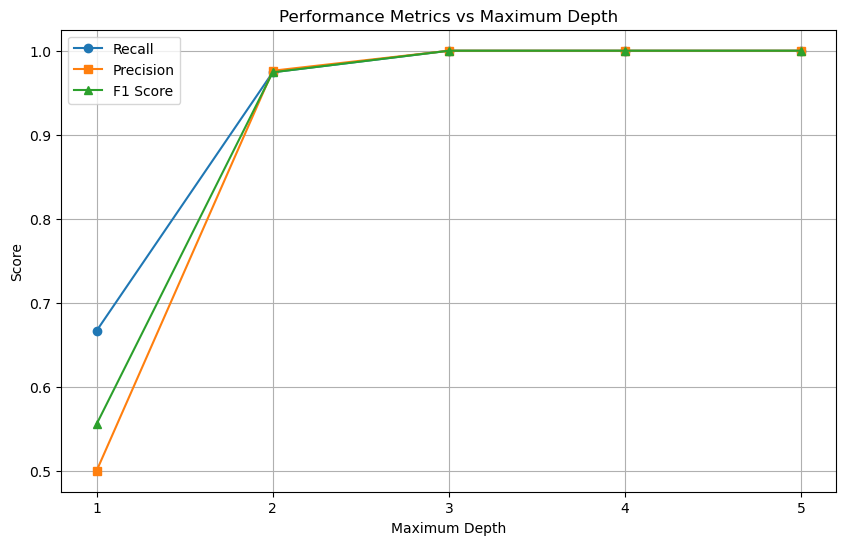

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(max_depths, recall_scores, label='Recall', marker='o')
plt.plot(max_depths, precision_scores, label='Precision', marker='s')
plt.plot(max_depths, f1_scores, label='F1 Score', marker='^')

plt.title('Performance Metrics vs Maximum Depth')
plt.xlabel('Maximum Depth')
plt.xticks(max_depths)
plt.ylabel('Score')
plt.legend()
plt.grid(True)

plt.show()
    

Problem 2

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_names = ['id', 'clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape',
                'marginal_adhesion','single_epithelial_cell_size', 'bare_nuclei',
                'bland_chromatin', 'normal_nucleoli','mitoses', 'class']
df = pd.read_csv(url, names=column_names, na_values='?')
df['bare_nuclei'] = df['bare_nuclei'].fillna(df['bare_nuclei'].median()) 

df.isnull().sum() 
df.head()  


,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [6]:
# Features and labels, convert the raw data into binary classification
X = df.drop(['id', 'class'], axis=1)
mapping = {4: 1}
y = df['class'].map(mapping).fillna(0).astype(int)


tc = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, min_samples_split=5, max_depth=2)
tc.fit(X, y)

first_split_feature_idx = tc.tree_.feature[0]  # Get the index of the first splitting feature
first_split_feature_name = X.columns[first_split_feature_idx]  # Get the feature name
first_split_threshold = tc.tree_.threshold[0]  # Get the splitting threshold (decision boundary)

print(f"The first splitting feature selected: {first_split_feature_name}")
print(f"Decision boundary value: {first_split_threshold}\n")

The first splitting feature selected: uniformity_of_cell_size
Decision boundary value: 2.5



In [7]:
def entropy(p):
    if 0 < p < 1:
        return -(p * np.log2(p) + (1 - p) * np.log2(1 - p))
    else:
        return 0

def gini(p):
    return 1 - p * p - (1 - p) * (1 - p)

def misclassification_error(p):
    return 1 - max(p, 1 - p)

# Determine the data volume of the left and right child nodes, and add boolean indices
left_subset = X[first_split_feature_name] <= first_split_threshold   
right_subset = X[first_split_feature_name] > first_split_threshold  

p_left = (y[left_subset] == 1).sum() / len(y[left_subset])  
p_right = (y[right_subset] == 1).sum() / len(y[right_subset])  

p_parent = (y == 1).sum() / len(y)  
entropy_parent = entropy(p_parent)  
gini_parent = gini(p_parent)
error_parent = misclassification_error(p_parent)

entropy_left = entropy(p_left)
entropy_right = entropy(p_right)

gini_left = gini(p_left)
gini_right = gini(p_right)

error_left = misclassification_error(p_left)
error_right = misclassification_error(p_right)

n = len(y)  
n_left = left_subset.sum()  
n_right = right_subset.sum()  

# Calculate the overall entropy, Gini index, and classification error after splitting using those of the left and right child nodes
entropy_after = (n_left / n) * entropy_left + (n_right / n) * entropy_right
gini_after = (n_left / n) * gini_left + (n_right / n) * gini_right
error_after = (n_left / n) * error_left + (n_right / n) * error_right

# Calculate the information gain
info_gain = entropy_parent - entropy_after

print(f"Parent node Entropy: {entropy_parent:.4f}, Gini: {gini_parent:.4f}, Misclassification Error: {error_parent:.4f}")
print(f"After splitting Entropy: {entropy_after:.4f}, Gini: {gini_after:.4f}, Misclassification Error: {error_after:.4f}")
print(f"Information Gain: {info_gain:.4f}")

Parent node Entropy: 0.9293, Gini: 0.4518, Misclassification Error: 0.3448
After splitting Entropy: 0.3503, Gini: 0.1329, Misclassification Error: 0.0758
Information Gain: 0.5790


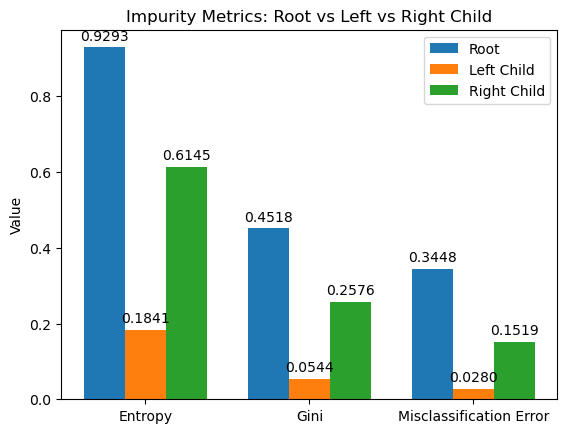

In [8]:
metrics = ['Entropy', 'Gini', 'Misclassification Error']
root_values = [entropy_parent, gini_parent, error_parent]
left_child_values = [entropy_left, gini_left, error_left]
right_child_values = [entropy_right, gini_right, error_right]

x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, root_values, width, label='Root')
rects2 = ax.bar(x, left_child_values, width, label='Left Child')
rects3 = ax.bar(x + width, right_child_values, width, label='Right Child')

ax.set_ylabel('Value')
ax.set_title('Impurity Metrics: Root vs Left vs Right Child')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

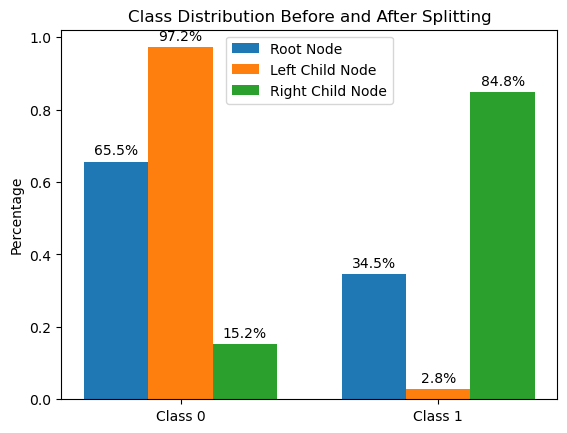

In [9]:
parent_class_0 = 1 - p_parent
parent_class_1 = p_parent
left_class_0 = 1 - p_left
left_class_1 = p_left
right_class_0 = 1 - p_right
right_class_1 = p_right

labels = ['Class 0', 'Class 1']

root_data = [parent_class_0, parent_class_1]

left_child_data = [left_class_0, left_class_1]

right_child_data = [right_class_0, right_class_1]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, root_data, width, label='Root Node')
rects2 = ax.bar(x, left_child_data, width, label='Left Child Node')
rects3 = ax.bar(x + width, right_child_data, width, label='Right Child Node')

ax.set_ylabel('Percentage')
ax.set_title('Class Distribution Before and After Splitting')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height * 100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

Problem 3

In [50]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns



url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

column_names = ['id', 'diagnosis'] + [f'feature_{i}' for i in range(1, 31)]

data = pd.read_csv(url, names=column_names)

data.head()


,id,diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [51]:
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis'].map({'M': 1, 'B': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion="gini", min_samples_leaf=2, min_samples_split=5, max_depth=2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"----------Decision Tree Model Evaluation Results without PCA------------")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

----------Decision Tree Model Evaluation Results without PCA------------
Precision: 0.9048
Recall: 0.9048
F1 Score: 0.9048


In [52]:
pca1 = PCA(n_components=1)  
X_pca1_train = pca1.fit_transform(X_train)  
X_pca1_test = pca1.transform(X_test)  

explained_variance_pc1 = pca1.explained_variance_ratio_[0]

# Create and train a decision tree classifier (using only PC1)
clf_pca1 = DecisionTreeClassifier(criterion="gini", min_samples_leaf=2, min_samples_split=5, max_depth=2, random_state=42)
clf_pca1.fit(X_pca1_train, y_train)  # Train the model

y_pred_pca1 = clf_pca1.predict(X_pca1_test)

precision_pca1 = precision_score(y_test, y_pred_pca1)
recall_pca1 = recall_score(y_test, y_pred_pca1)
f1_score_pca1 = f1_score(y_test, y_pred_pca1)

print(f"------------Decision Tree Model Evaluation Results with PCA (PC1)---------------")
print(f"Proportion of variance explained by PC1: {explained_variance_pc1:.4f}")
print(f"Precision: {precision_pca1:.4f}")
print(f"Recall: {recall_pca1:.4f}")
print(f"F1 Score: {f1_score_pca1:.4f}")

------------Decision Tree Model Evaluation Results with PCA (PC1)---------------
Proportion of variance explained by PC1: 0.9814
Precision: 0.9821
Recall: 0.8730
F1 Score: 0.9244


In [53]:
# Perform PCA dimensionality reduction, taking the first and second principal components (PC1 and PC2)
pca2 = PCA(n_components=2)
X_pca2_train = pca2.fit_transform(X_train)
X_pca2_test = pca2.transform(X_test)

explained_variance_pc2 = pca2.explained_variance_ratio_[1]
total_explained_variance = sum(pca2.explained_variance_ratio_)

# Create and train a decision tree classifier (using PC1 and PC2)
clf_pca2 = DecisionTreeClassifier(criterion="gini", min_samples_leaf=2, min_samples_split=5, max_depth=2)
clf_pca2.fit(X_pca2_train, y_train)
y_pred_pca2 = clf_pca2.predict(X_pca2_test)

precision_pca2 = precision_score(y_test, y_pred_pca2)
recall_pca2 = recall_score(y_test, y_pred_pca2)
f1_score_pca2 = f1_score(y_test, y_pred_pca2)

print(f"------------Decision Tree Model Evaluation Results with PCA (PC1 and PC2)---------------")
print(f"Proportion of variance explained by PC1: {explained_variance_pc1:.4f}")
print(f"Proportion of variance explained by PC2: {explained_variance_pc2:.4f}")
print(f"Total proportion of variance explained by PC1 + PC2: {total_explained_variance:.4f}")
print(f"Macro Precision: {precision_pca2:.4f}")
print(f"Macro Recall: {recall_pca2:.4f}")
print(f"Macro F1 Score: {f1_score_pca2:.4f}")

------------Decision Tree Model Evaluation Results with PCA (PC1 and PC2)---------------
Proportion of variance explained by PC1: 0.9814
Proportion of variance explained by PC2: 0.0165
Total proportion of variance explained by PC1 + PC2: 0.9979
Macro Precision: 0.9821
Macro Recall: 0.8730
Macro F1 Score: 0.9244


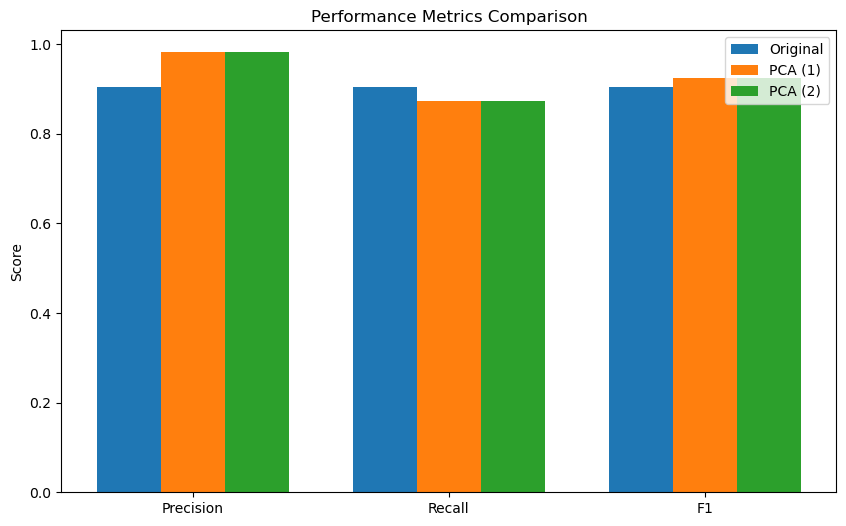

In [54]:
precision_no_pca = 0.9048
recall_no_pca = 0.9048
f1_no_pca = 0.9048

precision_pca1 = 0.9821
recall_pca1 = 0.8730
f1_pca1 = 0.9244

precision_pca12 = 0.9821
recall_pca12 = 0.8730
f1_pca12 = 0.9244

metrics = ['Precision', 'Recall', 'F1']

original_metrics = [precision_no_pca, recall_no_pca, f1_no_pca]

pca1_metrics = [precision_pca1, recall_pca1, f1_pca1]

pca2_metrics = [precision_pca12, recall_pca12, f1_pca12]

bar_width = 0.25
index = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar([i - bar_width for i in index], original_metrics, width=bar_width, label='Original', align='center')
plt.bar(index, pca1_metrics, width=bar_width, label='PCA (1)', align='center')
plt.bar([i + bar_width for i in index], pca2_metrics, width=bar_width, label='PCA (2)', align='center')

plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.xticks(index, metrics)
plt.legend()

plt.show()

-------------Decision Tree Model on Original Data--------------
Confusion Matrix:
[[102   6]
 [  6  57]]
True Positives (TP): 57
True Negative (TN): 102
False Positives (FP): 6
False Negative (FN): 6
True Positive Rate (TPR / Recall): 0.9048
False Positive Rate (FPR / Recall): 0.0556


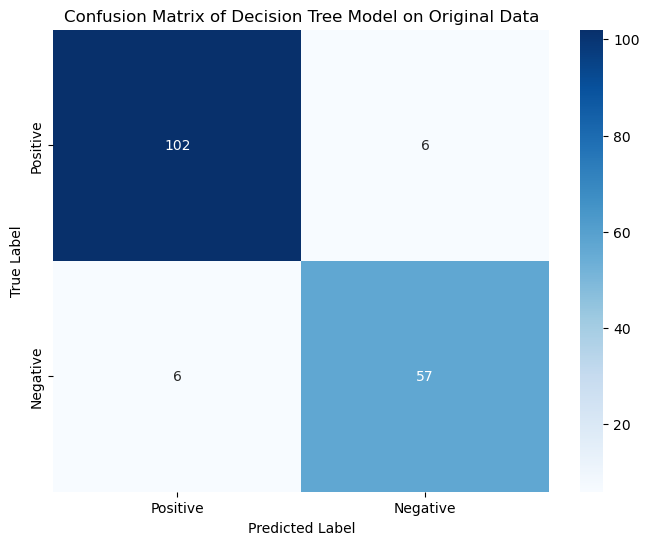

In [55]:
# Calculate the confusion matrix of the original data model
conf_matrix_orig = confusion_matrix(y_test, y_pred)

# Extract FP, TP, FN, TN
TN_orig, FP_orig, FN_orig, TP_orig = conf_matrix_orig.ravel()

# Calculate FPR and TPR
FPR_orig = FP_orig / (FP_orig + TN_orig)
TPR_orig = TP_orig / (TP_orig + FN_orig)

print(f"-------------Decision Tree Model on Original Data--------------")
print(f"Confusion Matrix:\n{conf_matrix_orig}")
print(f"True Positives (TP): {TP_orig}")
print(f"True Negative (TN): {TN_orig}")
print(f"False Positives (FP): {FP_orig}")
print(f"False Negative (FN): {FN_orig}")
print(f"True Positive Rate (TPR / Recall): {TPR_orig:.4f}")
print(f"False Positive Rate (FPR / Recall): {FPR_orig:.4f}")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_orig, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Decision Tree Model on Original Data')
plt.show()

-------------Decision Tree Model with PC1--------------
Confusion Matrix:
[[107   1]
 [  8  55]]
True Positives (TP): 55
True Negative (TN): 107
False Positives (FP): 1
False Negative (FN): 8
True Positive Rate (TPR / Recall): 0.8730
False Positive Rate (FPR): 0.0093


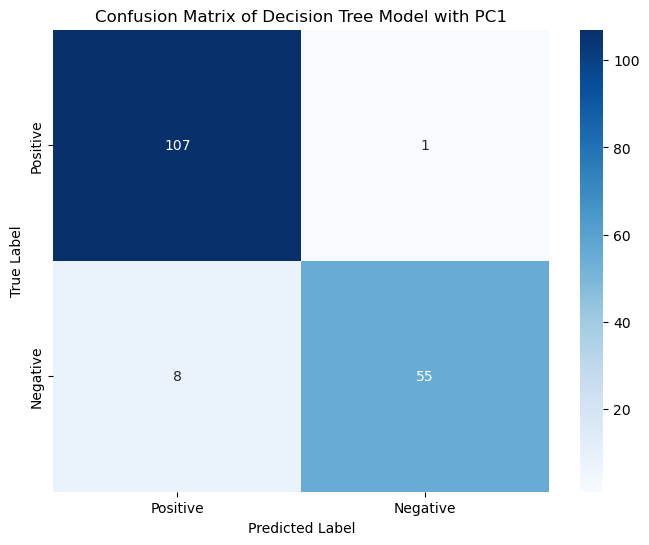

In [59]:
conf_matrix_pca1 = confusion_matrix(y_test, y_pred_pca1)

# Extract FP, TP, FN, TN
TN_pca1, FP_pca1, FN_pca1, TP_pca1 = conf_matrix_pca1.ravel()

# Calculate FPR and TPR
FPR_pca1 = FP_pca1 / (FP_pca1 + TN_pca1)
TPR_pca1 = TP_pca1 / (TP_pca1 + FN_pca1)

print(f"-------------Decision Tree Model with PC1--------------")
print(f"Confusion Matrix:\n{conf_matrix_pca1}")
print(f"True Positives (TP): {TP_pca1}")
print(f"True Negative (TN): {TN_pca1}")
print(f"False Positives (FP): {FP_pca1}")
print(f"False Negative (FN): {FN_pca1}")
print(f"True Positive Rate (TPR / Recall): {TPR_pca1:.4f}")
print(f"False Positive Rate (FPR): {FPR_pca1:.4f}")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pca1, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Decision Tree Model with PC1')

plt.show()

-------------Decision Tree Model with PC1 + PC2--------------
Confusion Matrix:
[[107   1]
 [  8  55]]
True Positives (TP): 55
True Negative (TN): 107
False Positives (FP): 1
False Negative (FN): 8
True Positive Rate (TPR / Recall): 0.8730
False Positive Rate (FPR): 0.0093


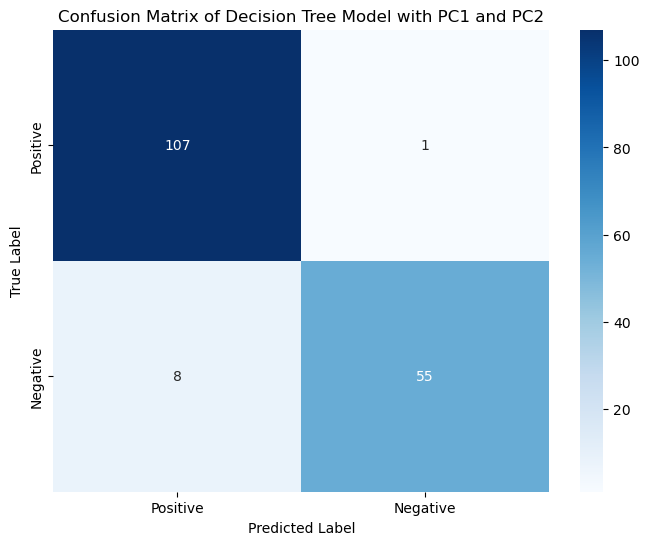

In [60]:
conf_matrix_pca2 = confusion_matrix(y_test, y_pred_pca2)

# Extract FP, TP, FN, TN
TN_pca2, FP_pca2, FN_pca2, TP_pca2 = conf_matrix_pca2.ravel()

# Calculate FPR and TPR
FPR_pca2 = FP_pca2 / (FP_pca2 + TN_pca2)
TPR_pca2 = TP_pca2 / (TP_pca2 + FN_pca2)

print(f"-------------Decision Tree Model with PC1 + PC2--------------")
print(f"Confusion Matrix:\n{conf_matrix_pca2}")
print(f"True Positives (TP): {TP_pca2}")
print(f"True Negative (TN): {TN_pca2}")
print(f"False Positives (FP): {FP_pca2}")
print(f"False Negative (FN): {FN_pca2}")
print(f"True Positive Rate (TPR / Recall): {TPR_pca2:.4f}")
print(f"False Positive Rate (FPR): {FPR_pca2:.4f}")
plt.figure(figsize=(8, 6))
sns.heatmap( conf_matrix_pca2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Decision Tree Model with PC1 and PC2')

plt.show()